In [37]:
import pandas as pd
import os
import gpxpy
import matplotlib.pyplot as plt

In [38]:
data_folder = ".\data"
file_list = os.listdir(data_folder)

In [39]:
file_list

['Andrew_Szabo_2021-06-25_04-37-58.CSV',
 'Andrew_Szabo_2021-06-25_04-37-58.GPX',
 'Andrew_Szabo_2021-06-25_04-37-58_RR.CSV']

In [40]:
for index, file in enumerate(file_list):
    file = (index, data_folder + '\\' + file)
    file_list[index] = file

In [41]:
file_list

[(0, '.\\data\\Andrew_Szabo_2021-06-25_04-37-58.CSV'),
 (1, '.\\data\\Andrew_Szabo_2021-06-25_04-37-58.GPX'),
 (2, '.\\data\\Andrew_Szabo_2021-06-25_04-37-58_RR.CSV')]

In [42]:
labels = ['training', 'gps', 'heart_rate']
labels = list(zip(range(3), labels))

In [43]:
labels

[(0, 'training'), (1, 'gps'), (2, 'heart_rate')]

In [44]:
df1 = pd.DataFrame(file_list, columns=['index', 'file_path']).set_index('index')
df2 = pd.DataFrame(labels, columns=['index', 'label']).set_index('index')

In [45]:
display(df1)
display(df2)

,file_path
index,
0,.\data\Andrew_Szabo_2021-06-25_04-37-58.CSV
1,.\data\Andrew_Szabo_2021-06-25_04-37-58.GPX
2,.\data\Andrew_Szabo_2021-06-25_04-37-58_RR.CSV


,label
index,
0,training
1,gps
2,heart_rate


In [46]:
df = pd.merge(df1, df2, left_index=True, right_index=True).set_index('label')
df.head()

,file_path
label,
training,.\data\Andrew_Szabo_2021-06-25_04-37-58.CSV
gps,.\data\Andrew_Szabo_2021-06-25_04-37-58.GPX
heart_rate,.\data\Andrew_Szabo_2021-06-25_04-37-58_RR.CSV


In [47]:
df.loc['training','file_path']

'.\\data\\Andrew_Szabo_2021-06-25_04-37-58.CSV'

In [48]:
training = pd.read_csv(df.loc['training', 'file_path'])
heart_rate = pd.read_csv(df.loc['heart_rate', 'file_path'])

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,3,5,6,7,8,9,10,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
with open(df.loc['gps', 'file_path'], 'r') as f:
    gpx_file = gpxpy.parse(f)

In [50]:
segment = gpx_file.tracks[0].segments[0]
print(segment.points[:100])

[GPXTrackPoint(46.75417833, 17.57048167, elevation=90.0, time=datetime.datetime(2021, 6, 25, 2, 37, 59, 188000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75417833, 17.57048167, elevation=90.0, time=datetime.datetime(2021, 6, 25, 2, 38, 0, 188000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.754175, 17.57048, elevation=90.0, time=datetime.datetime(2021, 6, 25, 2, 38, 1, 188000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75415667, 17.57047667, elevation=90.0, time=datetime.datetime(2021, 6, 25, 2, 38, 2, 188000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75413667, 17.57047667, elevation=91.0, time=datetime.datetime(2021, 6, 25, 2, 38, 3, 188000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75411167, 17.57048167, elevation=91.0, time=datetime.datetime(2021, 6, 25, 2, 38, 4, 189000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75408167, 17.57049333, elevation=91.0, time=datetime.datetime(2021, 6, 25, 2, 38, 5, 189000, tzinfo=SimpleTZ("Z"))), GPXTrackPoint(46.75404833, 17.57050667, elevation=91.0, time=date

In [51]:
coordinates = pd.DataFrame([{
    'time': p.time,
    'latitude': p.latitude,
    'longitude': p.longitude,
    'elevation': p.elevation} for p in segment.points
])
coordinates.set_index('time', inplace=True)

In [52]:
coordinates.head()

,latitude,longitude,elevation
time,,,
2021-06-25 02:37:59.188000+00:00,46.754178,17.570482,90.0
2021-06-25 02:38:00.188000+00:00,46.754178,17.570482,90.0
2021-06-25 02:38:01.188000+00:00,46.754175,17.570480,90.0
2021-06-25 02:38:02.188000+00:00,46.754157,17.570477,90.0
2021-06-25 02:38:03.188000+00:00,46.754137,17.570477,91.0


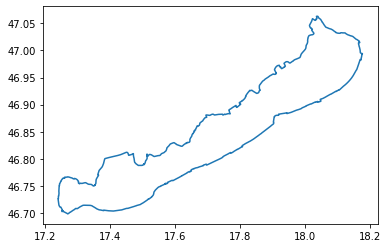

In [54]:
plt.plot(coordinates['longitude'], coordinates['latitude'])